# WEEK 3 ASSIGNMENT - GRAPH VISUALIZATION

**GROUP: Forhad Akbar, Adam Douglas, and Soumya Ghosh**

The purpose of this assignment is to retreive network data from a source, build a graph object of that data, then perform a basic analysis of that graph.

For this assignment, we used the "Reddit Pizza Requests" data from the Stanford SNAP website$^1$. This data set is a list of requests made by Reddit users for free pizza.

In [51]:
# Import necessary packages
import json
import networkx as nx
from pyvis import network as net
import matplotlib.pyplot as plt

In [52]:
# Load the raw data
f = open("pizza_request_dataset.json", "r")
content = f.read()

# Parse the JSON
raw = json.loads(content)

In [53]:
len(raw)

5671

The dataset contains a large number of requests. For this exercise, we will only include a small sample of requests, and limit to those requests in which the requester actually received pizza and where we know the user name of the person who provided the pizza.

Let's look at the format of each request:

In [54]:
raw[1]

{'giver_username_if_known': 'N/A',
 'in_test_set': False,
 'number_of_downvotes_of_request_at_retrieval': 2,
 'number_of_upvotes_of_request_at_retrieval': 6,
 'post_was_edited': True,
 'request_id': 't3_qysgy',
 'request_number_of_comments_at_retrieval': 8,
 'request_text': "Hello! It's been a hard 2 months with money and I listed some goodies on craigslist so I could make some food money for my family and the people never showed up =(  The cupboards are empty, no bread or P&amp;J. Is there anyone that wouldn't mind helping me out tonight? My family would appreciate it so very much. Thank you for your time in reading our plea. \n\nEdit: Tarn33 Came to are rescue and soon my family will be enjoying some much needed pizza!",
 'request_text_edit_aware': "Hello! It's been a hard 2 months with money and I listed some goodies on craigslist so I could make some food money for my family and the people never showed up =(  The cupboards are empty, no bread or P&amp;J. Is there anyone that wouldn

Each request is a `dictionary`. The fields we will want to utilize are: `'requester_username'`,`'giver_username_if_known'`, and `'requester_received_pizza'`.

Next we will filter the raw data to a more reasonable record count:

In [55]:
dataset = list(req for req in raw if req['requester_received_pizza']==True
               and req['giver_username_if_known'] != 'N/A')[:40]
len(dataset)

40

Next, we will extract the unique user names for both requesters and those who gave the pizza. These will become our nodes.

In [56]:
requesters = list(set(r['requester_username'] for r in dataset))
givers = list(set(g['giver_username_if_known'] for g in dataset))

num_req = len(requesters)
num_givers = len(givers)

print("There are " + str(num_req) + " requesters and " + str(num_givers) + " users who gave them pizza.")

There are 40 requesters and 39 users who gave them pizza.


Now we will find our edges. Since this is a directed graph (someone gave someone else pizza, but not necessarily vice-versa), we need to make sure the order is coded properly.

In [57]:
edges = list((e['giver_username_if_known'],e['requester_username']) for e in dataset)

In [58]:
# Initialize the graph object
pizza = nx.DiGraph()

In [59]:
# Add our nodes and edges
pizza.add_nodes_from(requesters)
pizza.add_nodes_from(givers)
pizza.add_edges_from(edges)

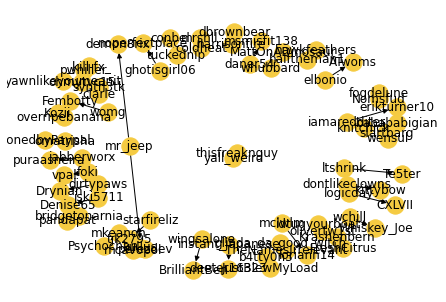

In [60]:
# Plot the graph
nx.draw(pizza, with_labels=True, node_color="#f5cb42")
plt.show()

We can see from our number of requesters and givers that most users sent pizza to a single user. Only one user gave to more than one request in our (small) dataset. Let's see who that was:

In [61]:
for k, v in nx.degree(pizza):
    if v > 1:
        print(str(k) + ' gave ' + str(v) + ' pizzas')

mr_jeep gave 2 pizzas


In [62]:
nx.diameter(pizza)

NetworkXError: Found infinite path length because the digraph is not strongly connected

We are not able to get diameter of the graph as it's is not connected. We will try another data set at this point.

### Works Cited

 1 - https://snap.stanford.edu/data/web-RedditPizzaRequests.html

# Adjnoun.gml data base

The file adjnoun.gml contains the network of common adjective and noun
adjacencies for the novel "David Copperfield" by Charles Dickens, as
described by M. Newman.  Nodes represent the most commonly occurring
adjectives and nouns in the book.  Node values are 0 for adjectives and 1
for nouns.  Edges connect any pair of words that occur in adjacent position
in the text of the book.  Please cite M. E. J. Newman, Finding community
structure in networks using the eigenvectors of matrices, Preprint
physics/0605087 (2006).

Source: http://networkdata.ics.uci.edu/data/adjnoun/

In [63]:
#load data
data = 'adjnoun.gml'
g = nx.read_gml(data)

#Print the info
print(nx.info(g))


Name: 
Type: Graph
Number of nodes: 112
Number of edges: 425
Average degree:   7.5893


In [64]:
# Print diameter
print('\nGraph Diameter:', nx.diameter(g)) 


Graph Diameter: 5


# Word Graph

In [65]:
n = net.Network(height = "800px", width = "100%", notebook = True)
nx_graph = nx.Graph(g)
n.from_nx(nx_graph)
n.show("graph.html")

## Number of neighbors connected

In [66]:
for n in g.nodes():
    print (n + ': ' + str(len(list(g.neighbors(n)))))
    
    

agreeable: 3
man: 14
old: 33
person: 9
anything: 2
short: 7
arm: 6
round: 11
aunt: 1
first: 17
bad: 4
air: 7
boy: 10
beautiful: 6
black: 12
face: 12
letter: 3
little: 49
young: 14
best: 9
course: 5
friend: 10
love: 5
part: 8
room: 15
thing: 14
time: 11
way: 15
better: 13
heart: 5
mind: 6
place: 12
right: 10
state: 5
woman: 7
word: 6
door: 7
eye: 10
bright: 9
evening: 5
morning: 4
certain: 8
day: 7
other: 28
child: 7
happy: 6
common: 3
dark: 5
kind: 10
night: 5
dear: 15
good: 28
home: 7
mother: 6
pretty: 13
open: 3
early: 4
fire: 3
full: 2
great: 13
master: 5
moment: 2
work: 2
general: 5
fancy: 1
voice: 6
head: 7
hope: 4
long: 12
greater: 2
hand: 12
hard: 6
red: 7
life: 7
glad: 1
large: 10
new: 12
white: 3
late: 3
whole: 13
light: 8
manner: 6
bed: 1
house: 5
low: 6
money: 2
ready: 2
small: 10
strange: 6
thought: 7
lost: 1
alone: 1
nothing: 6
miserable: 2
natural: 3
half: 1
wrong: 3
name: 1
pleasant: 5
possible: 2
side: 3
perfect: 2
poor: 10
quiet: 9
same: 21
strong: 7
something: 6
true:

The word "little" has higest 49 neighbours in the novel David Copperfield.

# Centrality

Source: https://networkx.org/documentation/stable/reference/algorithms/centrality.html

### Degree centrality: 
Compute the degree centrality for nodes.The degree centrality values are normalized by dividing by the maximum possible degree in a simple graph n-1 where n is the number of nodes in G.

In [67]:
degree_list = list(nx.degree_centrality(g).items())

# Get top 10 
sorted(degree_list, key = lambda x: x[1], reverse = True)[:10]

[('little', 0.44144144144144143),
 ('old', 0.2972972972972973),
 ('other', 0.25225225225225223),
 ('good', 0.25225225225225223),
 ('same', 0.1891891891891892),
 ('first', 0.15315315315315314),
 ('room', 0.13513513513513514),
 ('way', 0.13513513513513514),
 ('dear', 0.13513513513513514),
 ('man', 0.12612612612612611)]

In [68]:
max(list(nx.degree_centrality(g).values()))

0.44144144144144143

The word "litte" has the maximum degree of centrality.

### Closeness centrality: 
The closeness centrality is normalized to (n-1)/(|G|-1) where n is the number of nodes in the connected part of graph containing the node. If the graph is not completely connected, this algorithm computes the closeness centrality for each connected part separately.

In [69]:
closeness_list = list(nx.closeness_centrality(g).items())
# Get top 10 
sorted(closeness_list, key = lambda x: x[1], reverse = True)[:10]

[('little', 0.6166666666666667),
 ('old', 0.5467980295566502),
 ('good', 0.5260663507109005),
 ('other', 0.511520737327189),
 ('way', 0.4889867841409692),
 ('same', 0.4889867841409692),
 ('first', 0.4847161572052402),
 ('time', 0.4826086956521739),
 ('room', 0.47844827586206895),
 ('thing', 0.47639484978540775)]

Again, The word "litte" has the maximum Closeness centrality.